In [4]:
from phasediv import PhaseDiv3
from spimagine import volshow
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras.layers import *
from keras.optimizers import Adam
import sys
sys.path.append("/Users/dsaha/Python/alpao_calibration")
from calibration import Calibration
%matplotlib inline
import json
from scipy.spatial.distance import cdist
mirror = Calibration()
import datetime
import os
from random import random

In [13]:
size_X = 64;
size_Y = 64;
size_Z = 64;
p = PhaseDiv3(dshape = (size_X,size_Y,size_Z),   # shape of the output stack (Nz,Ny,Nx)
              units = (.1,)*3,          # pixelsize (dz,dy,dx) in micron
              lam = 0.5,                # wavelength in micron
              NA1=0.8,                 # Numerical Aperture of the detection obcejtive
                NA2 = 0,
              n = 1.33                  # refractive index of medium
              )

/Users/dsaha/python/phasediv/phasediv/phase_div3.py:84: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(1.*self.n**2-KR3**2*lam**2)


In [120]:
#Training for two modes of aberration"zernike(4 and 5)" with 1000 weights from "0,2" 1000 data points
datapoints = 10000
number_of_modes = 6
lowerlimit=0
upperlimit=0.5
weights = np.zeros((datapoints,number_of_modes))
dataset = np.zeros((datapoints,size_X*size_Y))


for i in range(0,datapoints):
    for j in range(0,number_of_modes):
        #if j==3 or j==4:
        weights[i,j] = np.random.uniform(lowerlimit,upperlimit)

for i in range(0,datapoints):
    wavefront = 0.0*p.zernike(1)
    for j in range(0,number_of_modes):
        if j==0:
            wavefront = wavefront + weights[i,j]*p.zernike(4)
        elif j==1:
            wavefront = wavefront + weights[i,j]*p.zernike(5)
        elif j==2:
            wavefront = wavefront + weights[i,j]*p.zernike(6)
        elif j==3:
            wavefront = wavefront + weights[i,j]*p.zernike(7)
        elif j==4:
            wavefront = wavefront + weights[i,j]*p.zernike(8)
        elif j==5:
            wavefront = wavefront + weights[i,j]*p.zernike(9)
        else: 
            pass
        
    psf = np.fft.fftshift(p._psf_incoherent(wavefront))
    focal_psf = psf[p.Nz//2]
    dataset[i,:]= focal_psf.flatten()
weights.reshape((datapoints,number_of_modes));
#print(weights)

KeyboardInterrupt: 

In [110]:
print(dataset.shape)
print(focal_psf.flatten().shape)
print(weights.shape)

(100000, 4096)
(4096,)
(100000, 6)


In [111]:
inp = Input(shape=(size_X * size_Y,))

lay = Dense(128, activation="tanh")(inp)

for _ in range(3):
    lay = Dense(256, activation="relu")(lay)
    
oup = Dense(number_of_modes)(lay)
#oup = Dense(10)(inp)
m = Model(inp,oup)

In [112]:
#print(m.summary())
m.compile(Adam(lr=0.0004),'mse')
#m.compile(loss='mean_squared_logarithmic_error',optimizer=Adam(0.0004))
hist = m.fit(dataset,weights,batch_size=10,epochs=200, validation_split=.1)

Train on 90000 samples, validate on 10000 samples
Epoch 1/200
90000/90000 [==============================] - 74s 822us/step - loss: 0.0081 - val_loss: 0.0040
Epoch 2/200
90000/90000 [==============================] - 71s 790us/step - loss: 0.0031 - val_loss: 0.0024
Epoch 3/200
90000/90000 [==============================] - 70s 780us/step - loss: 0.0021 - val_loss: 0.0016
Epoch 4/200
90000/90000 [==============================] - 70s 778us/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/200
90000/90000 [==============================] - 70s 779us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 6/200
90000/90000 [==============================] - 72s 799us/step - loss: 0.0010 - val_loss: 8.8474e-04
Epoch 7/200
90000/90000 [==============================] - 68s 756us/step - loss: 8.5736e-04 - val_loss: 7.9847e-04
Epoch 8/200
90000/90000 [==============================] - 68s 753us/step - loss: 7.5692e-04 - val_loss: 6.0492e-04
Epoch 9/200
90000/90000 [==============================] - 71s 785

90000/90000 [==============================] - 70s 775us/step - loss: 1.1971e-04 - val_loss: 1.8849e-04
Epoch 72/200
90000/90000 [==============================] - 76s 841us/step - loss: 1.2379e-04 - val_loss: 1.1637e-04
Epoch 73/200
90000/90000 [==============================] - 72s 797us/step - loss: 1.1703e-04 - val_loss: 1.0979e-04
Epoch 74/200
90000/90000 [==============================] - 66s 731us/step - loss: 1.1768e-04 - val_loss: 1.1178e-04
Epoch 75/200
90000/90000 [==============================] - 66s 730us/step - loss: 1.1618e-04 - val_loss: 1.7687e-04
Epoch 76/200
90000/90000 [==============================] - 71s 784us/step - loss: 1.1246e-04 - val_loss: 1.1734e-04
Epoch 77/200
90000/90000 [==============================] - 67s 742us/step - loss: 1.1403e-04 - val_loss: 9.8114e-05
Epoch 78/200
90000/90000 [==============================] - 70s 774us/step - loss: 1.1263e-04 - val_loss: 1.1158e-04
Epoch 79/200
90000/90000 [==============================] - 73s 815us/step - 

Epoch 141/200
90000/90000 [==============================] - 67s 745us/step - loss: 8.5892e-05 - val_loss: 9.5804e-05
Epoch 142/200
90000/90000 [==============================] - 67s 744us/step - loss: 8.8045e-05 - val_loss: 9.2402e-05
Epoch 143/200
90000/90000 [==============================] - 67s 745us/step - loss: 8.2485e-05 - val_loss: 9.9788e-05
Epoch 144/200
90000/90000 [==============================] - 67s 745us/step - loss: 7.9131e-05 - val_loss: 8.7886e-05
Epoch 145/200
90000/90000 [==============================] - 67s 743us/step - loss: 7.9198e-05 - val_loss: 1.3663e-04
Epoch 146/200
90000/90000 [==============================] - 67s 744us/step - loss: 7.7740e-05 - val_loss: 1.0938e-04
Epoch 147/200
90000/90000 [==============================] - 67s 744us/step - loss: 7.5611e-05 - val_loss: 8.9954e-05
Epoch 148/200
90000/90000 [==============================] - 67s 743us/step - loss: 8.2303e-05 - val_loss: 8.4769e-05
Epoch 149/200
90000/90000 [=============================

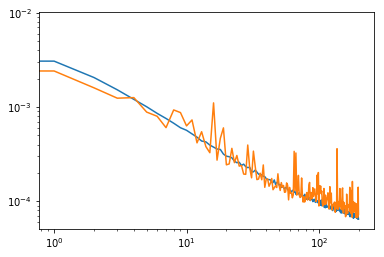

In [116]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

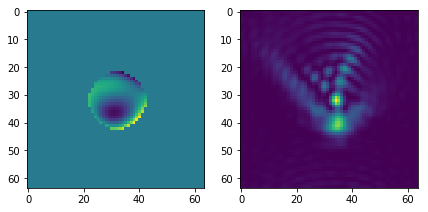

In [118]:
# define the wavefront as combination of some zernikes, e.g. astigmatism (z_5) and spherical (z_11)
plt.figure(figsize=(7,7))
unknown_wavefront = 0.1*p.zernike(6)+0.2*p.zernike(5)+0.2*p.zernike(4)+0.3*p.zernike(7)
plt.subplot(1,2,1)
plt.imshow(np.fft.fftshift(unknown_wavefront))
unknown_psf = np.fft.fftshift(p._psf_incoherent(unknown_wavefront))
unknown_focal_psf = unknown_psf[p.Nz//2]
plt.subplot(1,2,2)
plt.imshow(unknown_focal_psf)

In [119]:
predicted_zern_weights = m.predict(unknown_focal_psf.reshape(1,size_X*size_Y))
print(predicted_zern_weights)

[[ 0.19567008  0.19244643  0.11293095  0.31079757  0.01171559  0.00747405]]


In [ ]:
predicted_wavefront = np.zeros((size_X,size_Y))
#for i in range(0,number_of_modes):
predicted_wavefront = predicted_wavefront+ predicted_zern_weights[0,0]*p.zernike(5) + predicted_zern_weights[0,1]*p.zernike(6)
#print(predicted_zern_weights[0,i])
plt.imshow(np.fft.fftshift(predicted_wavefront))